In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import LeakyReLU
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [97]:
Y = pd.read_csv('/content/drive/MyDrive/AI3RobotProject/input.csv' , header=None)
X = pd.read_csv('/content/drive/MyDrive/AI3RobotProject/output.csv' , header=None)

In [110]:
Y.rename(columns = { 0:'theta 1', 1:'theta 2', 2:'theta 3', 3:'theta 4', 4:'theta 5', 5:'theta 6', 6:'theta 7'}, inplace = True)
Y.head()

,theta 1,theta 2,theta 3,theta 4,theta 5,theta 6,theta 7
0,-1.566699,-1.46385,-1.46385,-1.414214,-1.566699,-1.414214,-1.527525
1,-1.566699,-1.46385,-1.46385,-1.414214,-1.566699,-1.414214,-1.091089
2,-1.566699,-1.46385,-1.46385,-1.414214,-1.566699,-1.414214,-0.654654
3,-1.566699,-1.46385,-1.46385,-1.414214,-1.566699,-1.414214,-0.218218
4,-1.566699,-1.46385,-1.46385,-1.414214,-1.566699,-1.414214,0.218218


In [99]:
X.rename(columns = { 0:'x', 1:'y', 2:'z', 3:'phi', 4:'psi', 5:'gamma'}, inplace = True)
X.head()

,x,y,z,phi,psi,gamma
0,-0.031002,0.051451,0.044041,-0.778648,1.282829,-2.098064
1,-0.031002,0.051451,0.044041,0.035638,1.282829,-2.098064
2,-0.031002,0.051451,0.044041,0.849924,1.282829,-2.098064
3,-0.031002,0.051451,0.044041,1.664209,1.282829,-2.098064
4,-0.031002,0.051451,0.044041,2.478495,1.282829,-2.098064


In [100]:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std
print(X.shape)

(720000, 6)


In [101]:
Y_mean = np.mean(Y, axis=0)
Y_std = np.std(Y, axis=0)
Y = (Y - Y_mean) / Y_std

In [102]:
X_train, X_test, Y_train,  Y_test = train_test_split( X, Y, test_size=0.3 )

In [103]:
model = Sequential()

model.add(Dense(100, activation = 'relu', input_shape=(6,)))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(7, activation = 'linear'))
model.summary()
early_stop = EarlyStopping(monitor='loss', patience=15)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 100)               700       
                                                                 
 dense_47 (Dense)            (None, 100)               10100     
                                                                 
 dense_48 (Dense)            (None, 100)               10100     
                                                                 
 dense_49 (Dense)            (None, 100)               10100     
                                                                 
 dense_50 (Dense)            (None, 100)               10100     
                                                                 
 dense_51 (Dense)            (None, 7)                 707       
                                                                 
Total params: 41,807
Trainable params: 41,807
Non-tra

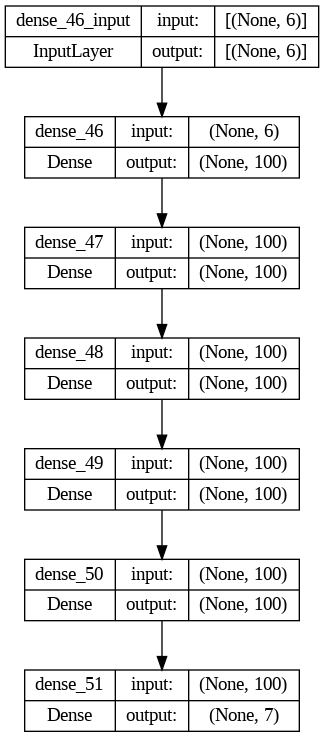

In [104]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [105]:
opt = Adam(lr = 'adaptive')
model.compile(optimizer=opt, loss='mean_absolute_error')

In [ ]:
resultMLP = model.fit(X_train, Y_train, batch_size=128, epochs=200, validation_data = (X_test, Y_test), callbacks=[early_stop])

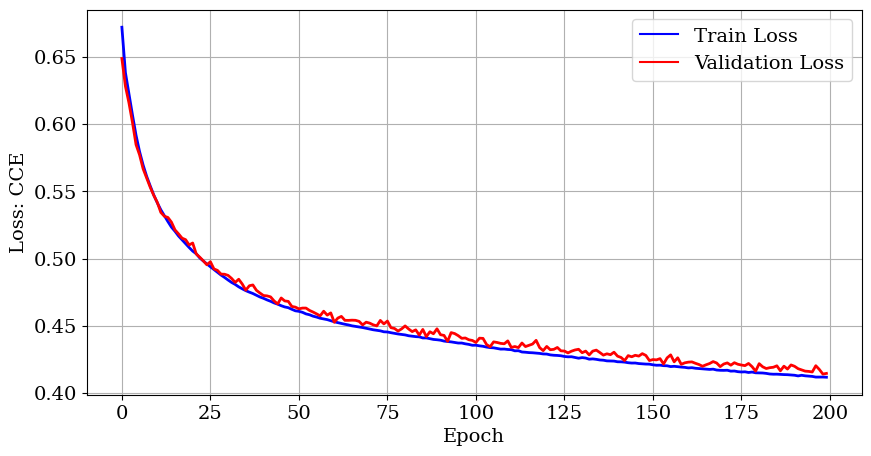

In [107]:
import matplotlib.pyplot as plt
import matplotlib

# Set the font family to serif
matplotlib.rcParams['font.family'] = 'serif'

# Set the desired fontsize
fontsize = 14

train_loss = resultMLP.history['loss']
val_loss = resultMLP.history['val_loss']

# Create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

# Plot the train and validation loss in the top subplot
axs.plot(train_loss, label='Train Loss', color ='b')
axs.plot(val_loss, label='Validation Loss', color='r')

# Set the axis labels and title for the top subplot
axs.set_xlabel('Epoch', fontsize=fontsize)
axs.set_ylabel('Loss: CCE', fontsize=fontsize)
#axs[0].set_title('Training and Validation Loss', fontsize=fontsize)

# Set the legend and grid for the top subplot
axs.legend(fontsize=fontsize)
axs.grid(True)

# Set the tick labels fontsize for the top subplot
axs.tick_params(axis='both', which='major', labelsize=fontsize)

# Set the line colors and linewidths for the top subplot
axs.lines[0].set_linewidth(2)
axs.lines[1].set_linewidth(2)


# Show the plot
plt.show()

plt.show()

In [111]:
from sklearn import metrics
test_y_hat = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, test_y_hat))

6750/6750 [==============================] - 13s 2ms/step
Mean Absolute Error: 0.4120129403835478
